In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kaduna_water_resources.csv")

In [3]:
df

,Unnamed: 0,ph,Hardness,Conductivity,Turbidity,TC,portability
0,0,3.716080,129.422921,592.885359,4.500656,8391.0,0
1,1,8.099124,224.236259,418.606213,3.055934,5330.0,0
2,2,8.316766,214.373394,363.266516,4.628771,8443.0,0
3,3,9.092223,181.101509,398.410813,4.075075,5500.0,0
4,4,5.584087,188.313324,280.467916,2.559708,4049.0,0
...,...,...,...,...,...,...,...
1679,1679,6.266800,187.829617,277.050802,3.652845,205.0,0
1680,1680,6.630252,160.920384,416.898071,5.181202,202.0,0
1681,1681,6.775631,154.372543,597.979274,3.017544,315.0,0
1682,1682,8.164992,278.340358,384.783185,4.162496,562.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1684 non-null   int64  
 1   ph            1684 non-null   float64
 2   Hardness      1684 non-null   float64
 3   Conductivity  1684 non-null   float64
 4   Turbidity     1684 non-null   float64
 5   TC            1684 non-null   float64
 6   portability   1684 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 92.2 KB


In [5]:
df.describe()

,Unnamed: 0,ph,Hardness,Conductivity,Turbidity,TC,portability
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03,1684.000000
mean,841.500000,7.084468,196.451376,427.322914,3.948001,2.840966e+05,0.002969
std,486.273243,1.509974,32.211391,79.596333,0.790003,8.289090e+06,0.054425
min,0.000000,0.227499,47.432000,181.483754,1.492207,0.000000e+00,0.000000
25%,420.750000,6.144842,177.203942,368.188309,3.407964,7.700000e+01,0.000000
50%,841.500000,7.032329,197.509503,422.456052,3.935400,4.080000e+02,0.000000
75%,1262.250000,8.009035,215.453670,481.545011,4.499066,1.725000e+03,0.000000
max,1683.000000,13.175402,323.124000,695.369528,6.494249,3.000000e+08,1.000000


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1679    False
1680    False
1681    False
1682    False
1683    False
Length: 1684, dtype: bool

In [7]:
df.isnull().sum()

Unnamed: 0      0
ph              0
Hardness        0
Conductivity    0
Turbidity       0
TC              0
portability     0
dtype: int64

In [8]:
df["portability"].value_counts()

portability
0    1679
1       5
Name: count, dtype: int64

<Axes: xlabel='portability', ylabel='count'>

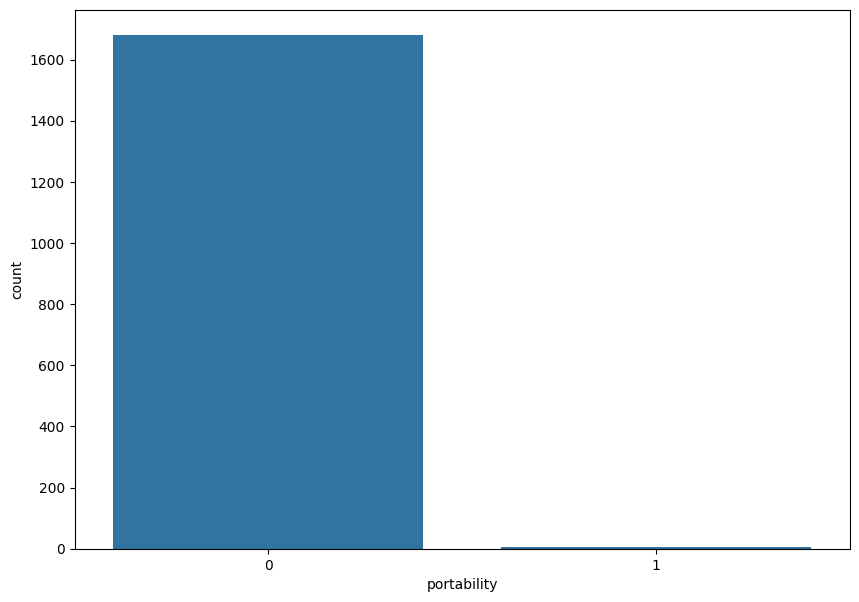

In [9]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'portability', data=df)

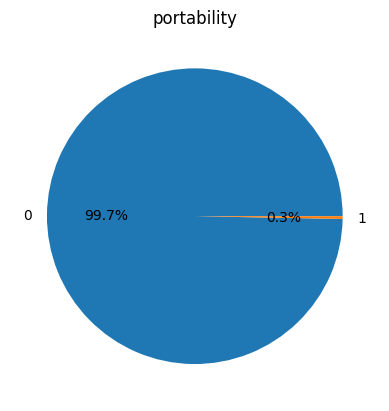

In [10]:
value_counts = df['portability'].value_counts()

plt.pie(value_counts, labels = value_counts.index, autopct = "%1.1f%%")
plt.title("portability")
plt.show()

In [11]:
df.head()

,Unnamed: 0,ph,Hardness,Conductivity,Turbidity,TC,portability
0,0,3.716080,129.422921,592.885359,4.500656,8391.0,0
1,1,8.099124,224.236259,418.606213,3.055934,5330.0,0
2,2,8.316766,214.373394,363.266516,4.628771,8443.0,0
3,3,9.092223,181.101509,398.410813,4.075075,5500.0,0
4,4,5.584087,188.313324,280.467916,2.559708,4049.0,0


In [12]:
df = df.drop("Unnamed: 0", axis = 1)

In [13]:
df1 = df.rename(columns = {"Hardness":"hard", "Conductivity":"cond", "Turbidity":"turb", "portability":"port"})

In [14]:
df1.columns

Index(['ph', 'hard', 'cond', 'turb', 'TC', 'port'], dtype='object')

In [15]:
df1.head()

,ph,hard,cond,turb,TC,port
0,3.716080,129.422921,592.885359,4.500656,8391.0,0
1,8.099124,224.236259,418.606213,3.055934,5330.0,0
2,8.316766,214.373394,363.266516,4.628771,8443.0,0
3,9.092223,181.101509,398.410813,4.075075,5500.0,0
4,5.584087,188.313324,280.467916,2.559708,4049.0,0


<Axes: >

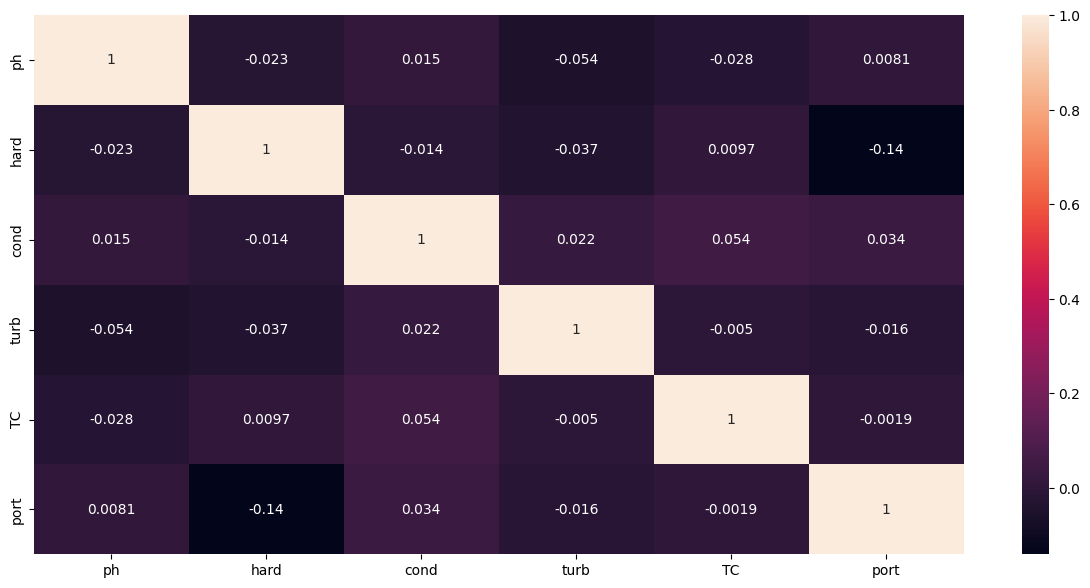

In [16]:
plt.figure(figsize = (15,7))
sns.heatmap(df1.corr(), annot = True)

In [17]:
df1.head()

,ph,hard,cond,turb,TC,port
0,3.716080,129.422921,592.885359,4.500656,8391.0,0
1,8.099124,224.236259,418.606213,3.055934,5330.0,0
2,8.316766,214.373394,363.266516,4.628771,8443.0,0
3,9.092223,181.101509,398.410813,4.075075,5500.0,0
4,5.584087,188.313324,280.467916,2.559708,4049.0,0


## Data Splitting 1

In [18]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

## FEATURE SCALING (Standardization using StandardScaler)

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)

## CLASS BALANCING ::: Handling class imbalance i.e (oversampling or undersampling)

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 4)
x, y = smote.fit_resample(x, y)

## Data Splitting 1

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

## MODEL DEVELOPMENT :::: Logistic Regression Model

In [22]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       226
           1       1.00      0.95      0.98       278

    accuracy                           0.97       504
   macro avg       0.97      0.98      0.97       504
weighted avg       0.98      0.97      0.97       504



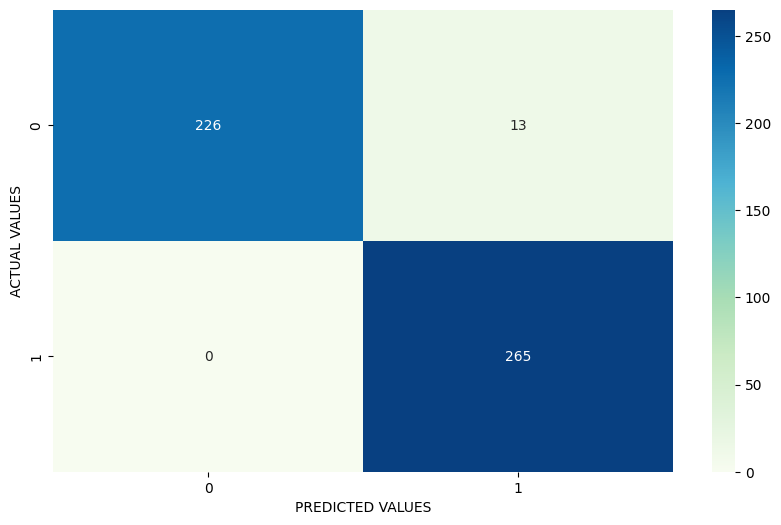

In [23]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## HYPER PARAMETER FINE-TUNING

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {"C":[0.1, 0.5, 0.2, 0.3, 0.6], "penalty":["l1", "l2"]}

In [26]:
gsearch = GridSearchCV(lr_model, parameters, cv = 10)

In [27]:
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)
bestmodel = gsearch.best_estimator_
pred = bestmodel.predict(x_test)
print (classification_report(y_test, pred))

{'C': 0.5, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       239
           1       0.95      1.00      0.98       265

    accuracy                           0.97       504
   macro avg       0.98      0.97      0.97       504
weighted avg       0.98      0.97      0.97       504



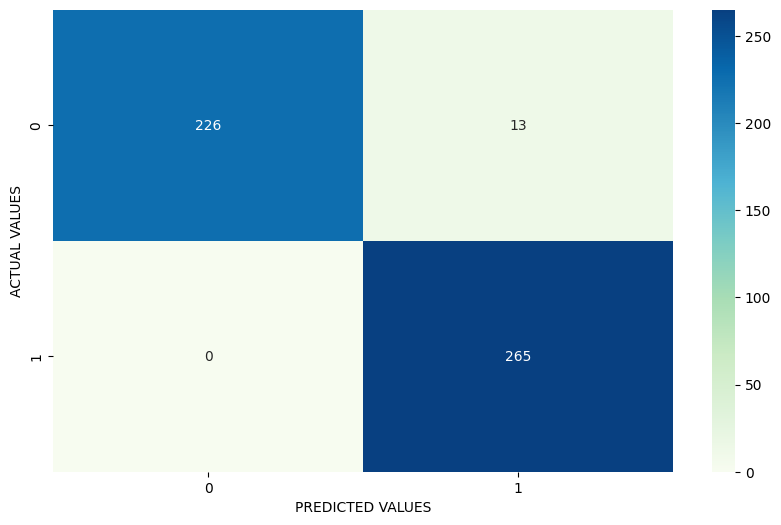

In [28]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()